# Data Visualization in Python - Introduction to Matplotlib

<img src='./figs/matplotlib_main.png'>

Screenshot from http://matplotlib.org/

---

### "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms."

Although matplotlib is sometimes considered outdated, it is still the basic plotting tool for Python and integrate very well into the Jupyer notebook environment. Plots are highly configurable, which unfortunately comes at the price of many command and keywords with can cause confusion. Matplotlib works as the backend for [seaborn](https://seaborn.pydata.org/index.html) to create pretty aesthetically pleasing statistical graphics.

### Tutorial for Matplotlib: 

http://matplotlib.org/users/tutorials.html

especially
http://matplotlib.org/users/pyplot_tutorial.html

### Gallery and Examples: 

http://matplotlib.org/gallery.html

http://matplotlib.org/examples/index.html

### Other Resources:

* [Matplotlib Usage Reference](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)
* [Numpy](http://www.numpy.org/) For scientific computation


---

# Outline

### Basic Plotting with matplotlib.pyplot

* **First Plots**
```python
>>> plt.plot()
```

* **Example: Damped Harmonic Oscillator**
```python
>>> fig = plt.figure()
>>> plt.title(<title>)
>>> plt.xlabel(<x-label>)
>>> plt.xlabel(<y-abel>)
```

### Figures and Axes - Plot Adjustments

```python
>>> fig, ax = plt.subplots()
>>> ax[0].plot(x, y)
>>> ax[0].set_xlabel(<x-label>)
```

### 3D Plots
```python
>>> ax = fig.gca(projection='3d')
```

### Plotting Networks
* **Plotting with iGraph**
* **Plotting with Matplotlib**

# Resources

* [Matplotlib Tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [Matplotlib Usage Reference](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)
* [Numpy](http://www.numpy.org/)

---

# Basic Plotting with matplotlib.pyplot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

* ``matplotlib inline``: create plots in the notebook
* ``matplotlib.pyplot``: main plotting module

## First Plots

Let's get started by plotting some values which lie on a straight line.

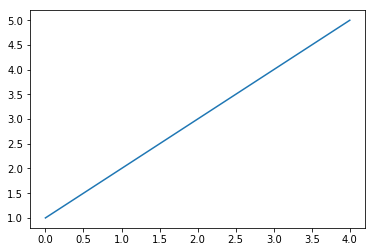

In [2]:
# Create a list with values
y = [1, 2, 3, 4, 5]

# Main plotting function
plt.plot(y)

The main plot command is
```python
>>> plt.plot()
```

If we provide only y-values, the x-values are set automatically starting from 0. This results in our case in the data points

``[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]``

### Plot x against y

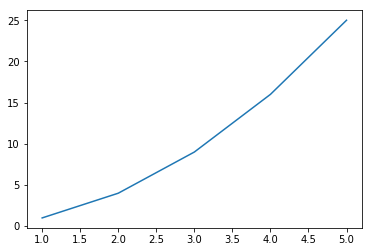

In [3]:
x = [1, 2, 3, 4, 5]
y = [xx ** 2 for xx in x]

# Plot values as a line
plt.plot(x, y)

# Plot line with markers for the data points
# plt.plot(x, y, marker='o')

We can control the properties of the data points and the line using **keyword arguments** (``**kwargs``) in the function call.

## Keyword arguments  for the plot command

Keyword arguments are usually abbreviated as ``**kwargs`` in the docstrings of function. In our case, we want to use:

* **line** properties
    * ``color='salmon'``
    * ``linestyle='dashed'``
    * ``linewidth=5``
    
    
* **marker** properties
    * ``markersize=15``
    * ``markerfacecolor='steelblue'``
    
For more::
```python
>>> plt.plot(<Shift-Tab>)
```

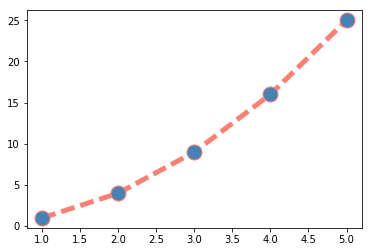

In [4]:
x = [1, 2, 3, 4, 5]
y = [xx ** 2 for xx in x]

plt.plot(x, y, 
         color='salmon', linestyle='dashed', linewidth=5, 
         marker='o', markersize=15, markerfacecolor='steelblue')

## Example: Damped Harmonic Oscillator

We plot the oscillation of a damped harmonic oscillator, which could be, for example, a pendulum whose oscillation is reduced to its equilibrium position by air drag.

Mathematical equation:

\begin{equation}
    f(t) = \text{e}^{-\sigma t} \cdot \cos(2\pi t)
\end{equation}

$\sigma$ is the damping factor.

In [5]:
# Basic package for scientific computation:
import numpy as np

### Function

In [6]:
def plt_damped_oscillator(s=0.5):
    """Plot a damped harmonic oscillator with damping constant ``s``.
    
    :param s: damping factor
    :type s: float
    """  
    
    # Create a the time array (aka "list" / "vector)
    # [0., 0.1, 0.2, 0.3, ..., 9.9]
    t = np.arange(0., 10., 0.1) 

    # Now we can apply a function on the array which calculated one value for
    # each entry
    y = np.exp(-s * t) * np.cos(2 * np.pi * t)
    
    # Both arrays have the same length:
    assert len(t) == len(y)

    
    # Create a figure and control figure size
    fig = plt.figure(figsize=(12, 8))
    
    # Plot the values
    plt.plot(t, y, color='steelblue', ls='dashed', lw=2)
#     plt.plot(t, -y, color='salmon', ls='dashed', lw=2)

    # Basic figure labeling:

    # Set title
    plt.title('Damped harmonic oscillator')

    # Set xlabel
    plt.xlabel('Time')

    # Set ylabel
    plt.ylabel('Amplitude')
    
    # Show the figure
    plt.show()

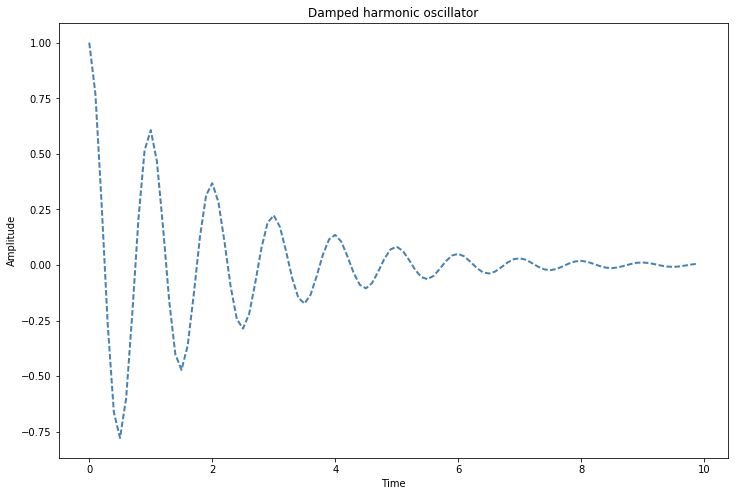

In [7]:
plt_damped_oscillator()

We can create a **figure** by using
```python
>>> fig = plt.figure()
```
We can add a title to the figure and labels to the x- and y-axis with
```python
>>> plt.title(<title>)
>>> plt.xlabel(<x-label>)
>>> plt.xlabel(<y-abel>)
```

### Excursion: Exploring the Damping Constant with IPython widgets

In [8]:
# Import widget to interact with the plot
from ipywidgets import interact

Explore region $\sigma = [0, 0.1, \ldots, 2.0]$

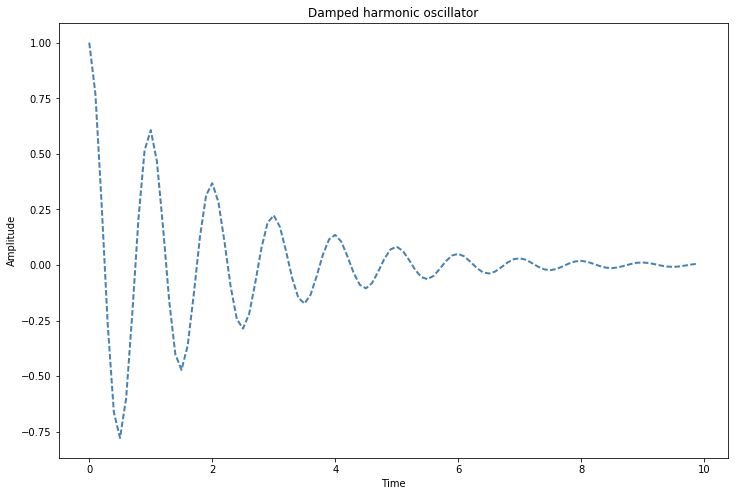

<function __main__.plt_damped_oscillator>

In [9]:
interact(plt_damped_oscillator, s=(0, 2, 0.1))

## Figure Aesthetics

We have created basic plots, but how can we adjust the figure to create camera-ready publications?

* How can we adjust the figure to our needs?
    * size?
    * font size?
    * labels?
    * etc.
* How do we create subplots?

### How can we adjust the plot?

---

# Figures and Axes - Plot Adjustments

In [10]:
# Widget to display images in the notebook
from IPython.display import Image

A plot with matplotlib contains many different elements that determine the layout. To create nice plots it is important to distinguish them in order to tweak the right parameters.

### What's the difference between Figure and Axes? 

In [11]:
Image('./fig_axes.png', width=400)

Source: https://i.stack.imgur.com/HZWkV.png

The **``figure``** is "everything" and contains the **``axes``**. Most adjustments of the plot regard the ``axes``.

**NB:** ``axes`` is **NOT** the plural of ``axis`` in this context!

### Plot Elements

In [12]:
Image('./anatomy1.png', width=500)

Source: http://matplotlib.org/_images/anatomy1.png

## Example: Exponential Function

We consider the exponential function

$$f(x) = \text{e}^x$$

and want to plot it in two **``subplots``**, one with normal and one with logarithmic scale. Moreover, we want to tweak the fonts of the title and axes labels. 

### Prepare Fonts

In [13]:
# Arial
arfont = {'fontname':'Arial', 'fontsize':'20'}

# Comic Sans
csfont = {'fontname':'Comic Sans MS', 'fontsize':'28', 'fontweight':'bold'}

### Create Subplots

In [14]:
# Create x and y values
x = np.arange(4)
y = np.exp(x)

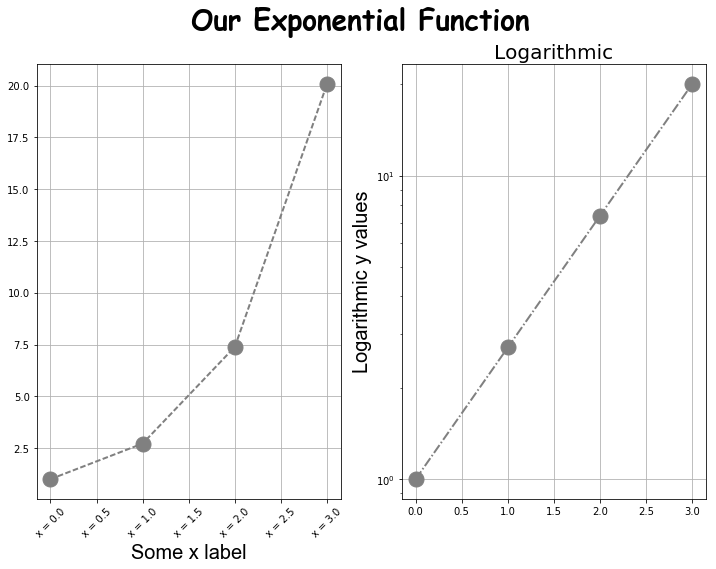

In [15]:
# Create one figure containing two subplots organized in one row and two columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# ``ax`` contains the two axes ax[0] and ax[1], one for each subplot

# Set title for the whole figure
fig.suptitle('Our Exponential Function', **csfont)


# First Axes:

# Plot data
ax[0].plot(x, y, marker='o', markersize=15, linestyle='--', lw=2, c='gray')


# Set x labels
ax[0].set_xlabel('Some x label', **arfont)

# Get and set x ticks labels
ticks = ax[0].get_xticks()
# We need as many labels as ticks
labels = ['x = ' + str(i) for i in ticks]
ax[0].set_xticklabels(labels, rotation=45);

# Show the grid
ax[0].grid('on')


# Second Axes: 

# Plot data
ax[1].plot(x, y, marker='o', markersize=15, linestyle='-.', lw=2, c='gray')

# Change y-axis to log scale
ax[1].set_yscale('log')

# Set axes title
ax[1].set_title("Logarithmic", fontsize=20)

# Set y label
ax[1].set_ylabel('Logarithmic y values', **arfont)

# Show the grid
ax[1].grid('on')

Whats happening in this cell? First, we create one **``figure``** containing two **``axes``** with
```python
>>> fig, ax = plt.subplots(nrows=1, ncols=2)
```
Then we plot the data using ``axes`` with
```python
>>> ax[0].plot(x, y)
``` 
instead of using the ``plt.plot()`` command from before. We can tweak the ``axes`` by calling, for example,
```python
>>> ax[0].set_yscale('log')
>>> ax[0].set_xlabel(<x-label>)
>>> ax[0].set_xtickslabels(<labels>)
```

To adjust the axes title and other tweaks, check out the ``rcParams``,
```python
plt.rcParams
```
and 
```python
plt.rcParams.update(...)
```
See http://matplotlib.org/users/customizing.html

---

# 3D Plots

It is also possible to create 3D plots in matplotlib. This requires the import of ``Axes3D`` from the module ``mpl_toolkits.mplot3d``. 

## Example: Lorenz Attractor

Ref: http://matplotlib.org/examples/mplot3d/lorenz_attractor.html

In [16]:
import numpy as np
# Make the figure interactive to zoom and rotate
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Equations

We integrate a simple nonlinear model for atmospheric convection. The so-called Lorenz system for the $x, y, z$ coordinates are given by the following equation:

\begin{eqnarray}
\dot{x}(t) &=& \sigma (y - x) \\
\dot{y}(t) &=& x(\rho - z) - y\\
\dot{z}(t) &=& xy - \beta z
\end{eqnarray}

where $\dot{x}(t) = \frac{\text{d}x}{\text{d}t}$ is the derivative of $x$ with respect to time.

In [17]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """Lorenz equation system for atmospheric convection. 
    
    The for the system parameters ``s``, ``r``, ``b``, chaotic trajectories 
    can be observed.
    """
    x_dot = s * (y - x)
    y_dot = x * (r - z) - y
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot

### Calculate the system trajectory

In [18]:
# Define timestep and number of data points to create
dt = 0.01
stepCnt = 10000

In [19]:
# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

<IPython.core.display.Javascript object>


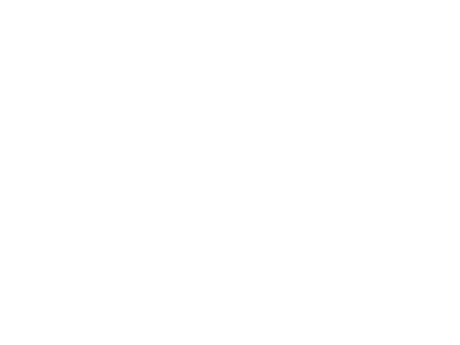

<IPython.core.display.Javascript object>


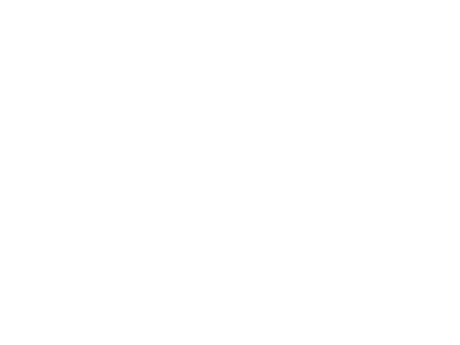

In [20]:
# Create a figure
fig = plt.figure(figsize=(8, 6))

# Create a three dimensional axes within the figure
ax = fig.gca(projection='3d')

# Plot trajectory
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
# ax.axis('off')

plt.show()

---

# Plotting Networks

We will plot a randomly generated network using two approaches:

* the iGraph libray http://igraph.org/python/
* a routine written with matplotlib

In [21]:
import igraph as ig
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Erdös-Renyi Random Graph

Create an Erdös-Renyi random graph with ``n=20`` vertices and the link probability ``p=0.4``.

In [22]:
g = ig.Graph.Erdos_Renyi(n=20, p=0.4)

In [23]:
# Number of vertices
print "# vertices:", g.vcount()

# Number of edges
print "# edges:", g.ecount()

# Vertex degree sequence:
print "Node degrees:", g.vs().degree()


# vertices: 20
# edges: 79
Node degrees: [7, 8, 9, 10, 10, 8, 7, 9, 5, 8, 9, 8, 8, 5, 9, 8, 8, 10, 5, 7]


### Set edge weights drawn randomly from the interval $[0, 1[$:

In [24]:
g.es()['weight'] = np.random.random(g.ecount())

# See edge attributes
g.es.attributes()

['weight']

## Plot Network

We can use the fact that the graph is an ``igraph.Graph`` instance to generate a layout. 

Different layouts are available, for example:

    * Fruchterman-Reingold
    * bipartite 
    * grid
    * circular

For other layout types, see ``g.layout_<Shift-Tab>``.

In [25]:
layout = g.layout_fruchterman_reingold(weights=g.es()['weight'])

### Plotting with iGraph

The network can be plotted using iGraphs plotting function and the generated layout.

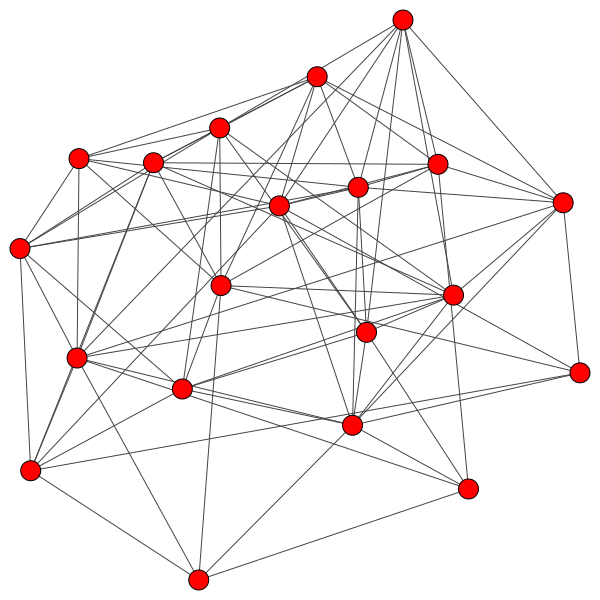

In [26]:
ig.plot(g, layout=layout)

Functional, but aesthetically not very pleasing. Much tweaking is possible. However, let's use what we have learned with Matplotlib to generate our own plotting routine.

## Plotting with Matplotlib

We will make use of the ``layout`` generate above for the position of nodes and edges.

With Matplotlib we can control many aspects of the plot. We will concentrate on:

* node sizes
* edge width
* node colors

#### Functions

In [27]:
def get_markersizes(g, new_min=10, new_max=20):
    """Return a list of marker sizes using the degrees of the graph vertices.
    
    The marker sizes are scaled proportionally to the degrees of the nodes.
    
    :param g: graph
    :type g: igraph.Graph
    
    :returns: list of marker sizes
    :rtype: list
    """
    old_min = min(g.vs().degree())
    old_max = max(g.vs().degree())
    ms = [scale_size(v.degree(), old_min, old_max, new_min, new_max) for v in g.vs()]
    return ms

def get_linewidths(g, new_min=0.5, new_max=2):
    """Return a list of line widths using the edge weights of the graph.
    
    The line widths are scaled proportionally to their ``weight`` between 
    ``new_min`` and ``new_max``
    
    :param g: graph
    :type g: igraph.Graph
    
    :returns: list of line widths
    :rtype: list
    """
    old_min = min(g.es()['weight'])
    old_max = max(g.es()['weight'])
    lw = [scale_size(e['weight'], old_min, old_max, new_min, new_max) for e in g.es()]
    return lw

def scale_size(x, old_min, old_max, new_min, new_max):
    """Scale ``x`` from old to new limit values."""    
    m = (new_max - new_min) / float(old_max - old_min)
    return (x - old_min) * m + new_min

def get_markercolors(g):
    """Return a list of colors for the vertices in ``g``.
    
    :param g: graph
    :type g: igraph.Graph
    """
    # Set all colors to steelblue:
    colors = ['steelblue' for v in g.vs()]
    
    # Set color of the node with the highest betweenness centrality to 'salmon'
    i = np.argmax(g.vs().betweenness())
    colors[i] = 'salmon'
    return colors

In [28]:
def plot_nw(g, layout):
    """Plot the graph ``g`` using the ``layout`` and return the figure.
    
    :param g: graph
    :type g: igraph.Graph
    :param layout: layout containing the coordinates ot the vertices
    :type layout: igraph.layout.Layout
    
    :returns: network figure
    :rtype: matplotlib.figure.Figure
    """
    
    # Prepare figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))

    # We could check the boundaries of the layout with
    # layout.boundaries()
    
    # Edges:
    
    # Set linewidth
    lwidths = get_linewidths(g, new_min=0.5, new_max=2)
    
    # Plot edges
    for i in xrange(g.ecount()):
        e = g.es()[i]
        # Each edge has a source and a target node:
        s = e.source
        t = e.target
        # The coordinates of the notes are contained in layout.coords
        xy1 = layout.coords[s]
        xy2 = layout.coords[t]
        #Plot edge
        ax.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]], lw=lwidths[i], color='gray')
        
    # Vertices:
    
    # Set markersizes
    msizes = get_markersizes(g)
    
    # Set markercolors:
    mcolors = get_markercolors(g)
    
    # Plot edges
    for i in xrange(g.vcount()):
        v = g.vs()[i]
        x, y = layout.coords[i]
        ax.plot(x, y, color=mcolors[i], marker='o', ms=msizes[i])
    
    
#     # Bonus: Annotation
    
#     # Annotate the node with the highest betweenness centrality:
#     i = mcolors.index('salmon')
#     vertex_pos = layout.coords[np.argmax(g.vs().betweenness())]
    
#     # Position text in lower right corner:
#     text_pos = layout.boundaries()[0]
    
#     ax.annotate(s='Important node', xy=vertex_pos, xytext=text_pos, 
#                 fontsize=20, fontname='Arial',
#                 arrowprops={'arrowstyle':'->'})
    ax.axis('off')

    return fig

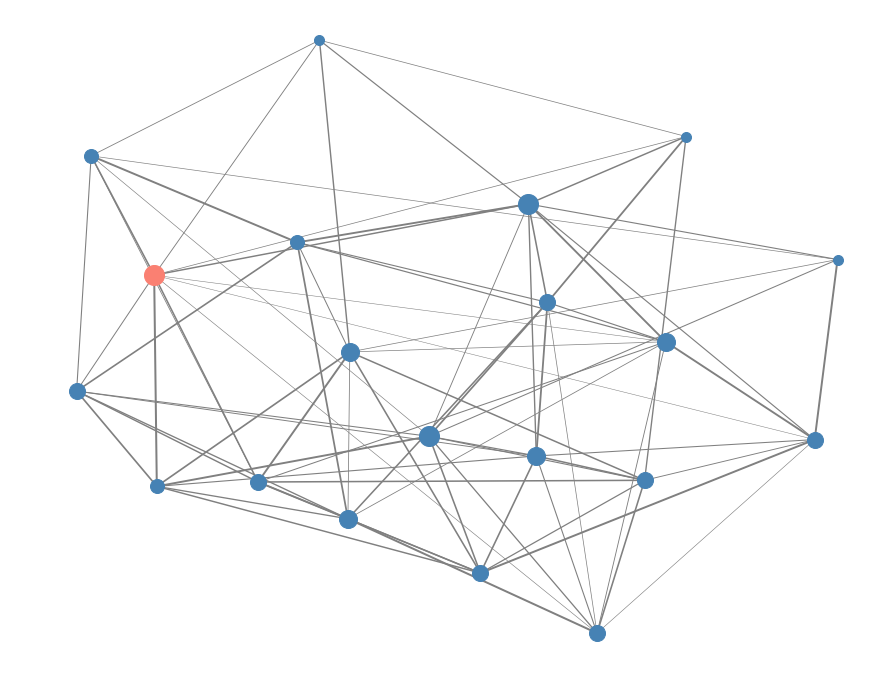

In [29]:
fig = plot_nw(g, layout)

### Save figure

In [30]:
fig.savefig('network.png')

---

# Extra: Simple Animation

Let's create a simple animation of the damped harmonic oscillator.

In [31]:
import numpy as np
import time
from IPython.display import clear_output
from IPython.display import display

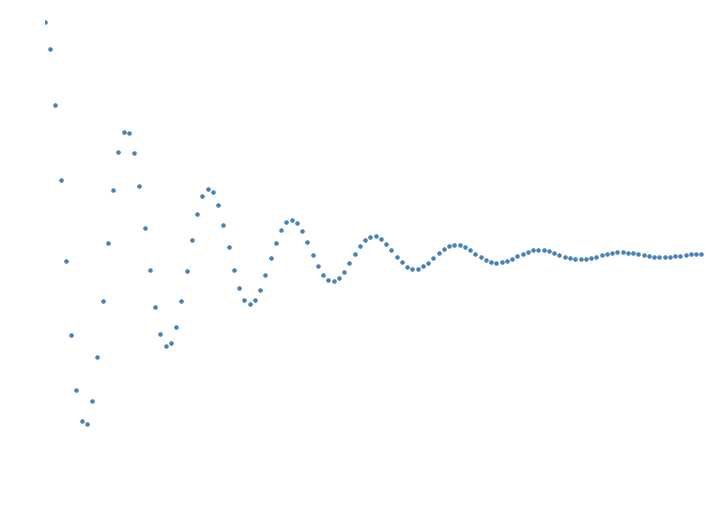

In [32]:
fig, ax = plt.subplots(figsize=(12, 9))

# Damped harmonic oscillator
x = np.arange(0, np.pi * 8, 0.2)
y = np.exp(-0.2 * x) * np.cos(2 * x)

# Adjust axes
ax.autoscale(False)
ax.set_xlim(0, max(x) + 0.5)
ax.set_ylim(-1.05, 1.05)
ax.axis('off')

# Plot data and refresh
for i in range(len(x)):
    ax.scatter(x[i],y[i], s=12, c='steelblue')
    time.sleep(0.01)
    clear_output(True)    
    display(fig)
    
plt.close()